# <span style="color:purple">Question 4</span>

## Name: Kelly Geiger

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
from datetime import datetime, timedelta
import pandas as pd
from siphon.simplewebservice.wyoming import WyomingUpperAir
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Bring in the CSV file and read in the dataframe

In [2]:
file = '/spare11/atm350/kg174144/hw4/OUN_20130520_LSR.csv'
! ls -l {file}

-rw-r--r--. 1 kg174144 student 7110 Apr  8 21:45 /spare11/atm350/kg174144/hw4/OUN_20130520_LSR.csv


In [3]:
df = pd.read_csv(file, dtype='string')

In [4]:
df

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
0,201305200008,2013/05/20 00:08,35.51,-96.72,0.0,OUN,T,TORNADO,2 NW PRAGUE,LINCOLN,OK,BROADCAST MEDIA,<NA>,OKC081,Lincoln
1,201305200010,2013/05/20 00:10,35.38,-96.94,61.0,OUN,G,TSTM WND GST,3 NNW SHAWNEE,POTTAWATOMIE,OK,MESONET,<NA>,OKC125,Pottawatomie
2,201305200024,2013/05/20 00:24,35.58,-96.69,1.0,OUN,H,HAIL,6 N PRAGUE,LINCOLN,OK,PUBLIC,<NA>,OKC081,Lincoln
3,201305200105,2013/05/20 01:05,36.88,-96.91,59.0,OUN,G,TSTM WND GST,8 E NEWKIRK,KAY,OK,MESONET,<NA>,OKC071,Kay
4,201305201730,2013/05/20 17:30,34.78,-96.66,1.25,OUN,H,HAIL,ADA,PONTOTOC,OK,PUBLIC,<NA>,OKC123,Pontotoc
5,201305201854,2013/05/20 18:54,34.73,-97.96,1.75,OUN,H,HAIL,6 N MARLOW,GRADY,OK,PUBLIC,<NA>,OKC051,Grady
6,201305201856,2013/05/20 18:56,34.76,-97.96,1.0,OUN,H,HAIL,1 S RUSH SPRINGS,GRADY,OK,EMERGENCY MNGR,<NA>,OKC051,Grady
7,201305201902,2013/05/20 19:02,34.52,-98.07,1.0,OUN,H,HAIL,6 W DUNCAN,STEPHENS,OK,AMATEUR RADIO,<NA>,OKC137,Stephens
8,201305201915,2013/05/20 19:15,33.98,-98.52,1.25,OUN,H,HAIL,1 W SHEPPARD AFB,WICHITA,TX,TRAINED SPOTTER,<NA>,TXC485,Wichita
9,201305201920,2013/05/20 19:20,33.98,-98.50,1.75,OUN,H,HAIL,SHEPPARD AFB,WICHITA,TX,TRAINED SPOTTER,<NA>,TXC485,Wichita


## Define the needed variables, Hail, Tornado, Wind Gust and Damage 

In [5]:
hail=df.loc[df['TYPECODE']=='H']
hail

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
2,201305200024,2013/05/20 00:24,35.58,-96.69,1.0,OUN,H,HAIL,6 N PRAGUE,LINCOLN,OK,PUBLIC,<NA>,OKC081,Lincoln
4,201305201730,2013/05/20 17:30,34.78,-96.66,1.25,OUN,H,HAIL,ADA,PONTOTOC,OK,PUBLIC,<NA>,OKC123,Pontotoc
5,201305201854,2013/05/20 18:54,34.73,-97.96,1.75,OUN,H,HAIL,6 N MARLOW,GRADY,OK,PUBLIC,<NA>,OKC051,Grady
6,201305201856,2013/05/20 18:56,34.76,-97.96,1.0,OUN,H,HAIL,1 S RUSH SPRINGS,GRADY,OK,EMERGENCY MNGR,<NA>,OKC051,Grady
7,201305201902,2013/05/20 19:02,34.52,-98.07,1.0,OUN,H,HAIL,6 W DUNCAN,STEPHENS,OK,AMATEUR RADIO,<NA>,OKC137,Stephens
8,201305201915,2013/05/20 19:15,33.98,-98.52,1.25,OUN,H,HAIL,1 W SHEPPARD AFB,WICHITA,TX,TRAINED SPOTTER,<NA>,TXC485,Wichita
9,201305201920,2013/05/20 19:20,33.98,-98.50,1.75,OUN,H,HAIL,SHEPPARD AFB,WICHITA,TX,TRAINED SPOTTER,<NA>,TXC485,Wichita
10,201305201927,2013/05/20 19:27,35.51,-97.75,3.25,OUN,H,HAIL,YUKON,CANADIAN,OK,NEWSPAPER,<NA>,OKC017,Canadian
11,201305201928,2013/05/20 19:28,35.39,-97.60,1.0,OUN,H,HAIL,WILL ROGERS AIRPORT,OKLAHOMA,OK,NWS EMPLOYEE,<NA>,OKC109,Oklahoma
13,201305202006,2013/05/20 20:06,35.38,-97.50,2.5,OUN,H,HAIL,3 NNW MOORE,OKLAHOMA,OK,TRAINED SPOTTER,<NA>,OKC109,Oklahoma


In [6]:
windg=df.loc[df['TYPECODE']=='G']
windg

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
1,201305200010,2013/05/20 00:10,35.38,-96.94,61.0,OUN,G,TSTM WND GST,3 NNW SHAWNEE,POTTAWATOMIE,OK,MESONET,<NA>,OKC125,Pottawatomie
3,201305200105,2013/05/20 01:05,36.88,-96.91,59.0,OUN,G,TSTM WND GST,8 E NEWKIRK,KAY,OK,MESONET,<NA>,OKC071,Kay
25,201305202339,2013/05/20 23:39,34.38,-96.46,80.0,OUN,G,TSTM WND GST,2 WNW WAPANUCKA,JOHNSTON,OK,TRAINED SPOTTER,SPOTTER REPORTED TREE BRANCHES DOWN IN AREA,OKC069,Johnston
27,201305210105,2013/05/21 01:05,34.21,-97.24,62.0,OUN,G,TSTM WND GST,7 WNW ARDMORE,CARTER,OK,MESONET,<NA>,OKC019,Carter
39,201305211017,2013/05/21 10:17,34.90,-98.24,77.0,OUN,G,TSTM WND GST,2 W CYRIL,CADDO,OK,AMATEUR RADIO,<NA>,OKC015,Caddo
46,201305211050,2013/05/21 10:50,34.98,-97.93,60.0,OUN,G,TSTM WND GST,2 NNW NINNEKAH,GRADY,OK,MESONET,<NA>,OKC051,Grady


In [7]:
tornado = df.loc[df['TYPECODE']=='T']
tornado

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
0,201305200008,2013/05/20 00:08,35.51,-96.72,0.0,OUN,T,TORNADO,2 NW PRAGUE,LINCOLN,OK,BROADCAST MEDIA,<NA>,OKC081,Lincoln
12,201305201956,2013/05/20 19:56,35.25,-97.60,0.0,OUN,T,TORNADO,NEWCASTLE,MCCLAIN,OK,BROADCAST MEDIA,LIFTED AROUND 336 PM. ESTIMATED PATH LENGTH OF...,OKC087,McClain
16,201305202130,2013/05/20 21:30,35.50,-96.91,0.0,OUN,T,TORNADO,1 W MEEKER,LINCOLN,OK,BROADCAST MEDIA,REPORTED BY KWTV,OKC081,Lincoln


In [8]:
windd=df.loc[df['TYPECODE']=='D']
windd

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
23,201305202245,2013/05/20 22:45,34.28,-97.04,0.0,OUN,D,TSTM WND DMG,GENE AUTRY,CARTER,OK,EMERGENCY MNGR,EM REPORTS ROOF BLOWN OFF OF OLD GENE AUTRY GYM.,OKC019,Carter
26,201305210100,2013/05/21 01:00,33.99,-96.39,0.0,OUN,D,TSTM WND DMG,1 W DURANT,BRYAN,OK,EMERGENCY MNGR,EMERGENCY MANAGEMENT REPORTS TREES DOWN AND PO...,OKC013,Bryan
40,201305211020,2013/05/21 10:20,34.90,-98.20,0.0,OUN,D,TSTM WND DMG,CYRIL,CADDO,OK,AMATEUR RADIO,TREE DAMAGE AND POWERLINES DOWN.,OKC015,Caddo
41,201305211020,2013/05/21 10:20,34.90,-98.20,0.0,OUN,D,TSTM WND DMG,CYRIL,CADDO,OK,EMERGENCY MNGR,TREE DAMAGE AND POWERLINES DOWN.,OKC015,Caddo
43,201305211026,2013/05/21 10:26,34.94,-98.14,0.0,OUN,D,TSTM WND DMG,CEMENT,CADDO,OK,AMATEUR RADIO,ROOF OFF OF BUILDING BY HIGHWAY 277...BLOCKING...,OKC015,Caddo
45,201305211049,2013/05/21 10:49,34.94,-98.14,0.0,OUN,D,TSTM WND DMG,CEMENT,CADDO,OK,AMATEUR RADIO,TREES AND POWER LINES DOWN,OKC015,Caddo


## Set the longitudes and latitudes to each variable

In [9]:
lattornado=tornado['LAT']
lontornado=tornado['LON']
lathail=hail['LAT']
lonhail=hail['LON']
latwindg=windg['LAT']
lonwindg=windg['LON']
latwindd=windd['LAT']
lonwindd=windd['LON']

## Convert the variables to floats so they plot

In [10]:
lattornado=lattornado.astype("float32")
lontornado=lontornado.astype("float32")
latwindg=latwindg.astype("float32")
lonwindg=lonwindg.astype("float32")
lathail=lathail.astype("float32")
lonthail=lonhail.astype("float32")
latwindd=latwindd.astype("float32")
lonwindd=lonwindd.astype("float32")

## Set dimensions and resolution

In [17]:
lonW = -103
lonE = -94
latS = 32
latN = 38
cLon= (lonW + lonE) / 2
cLat = (latS + latN) / 2
proj_data = ccrs.PlateCarree()
proj_map = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
res = '50m'
cLon

-98.5

## Create the plot with all the features

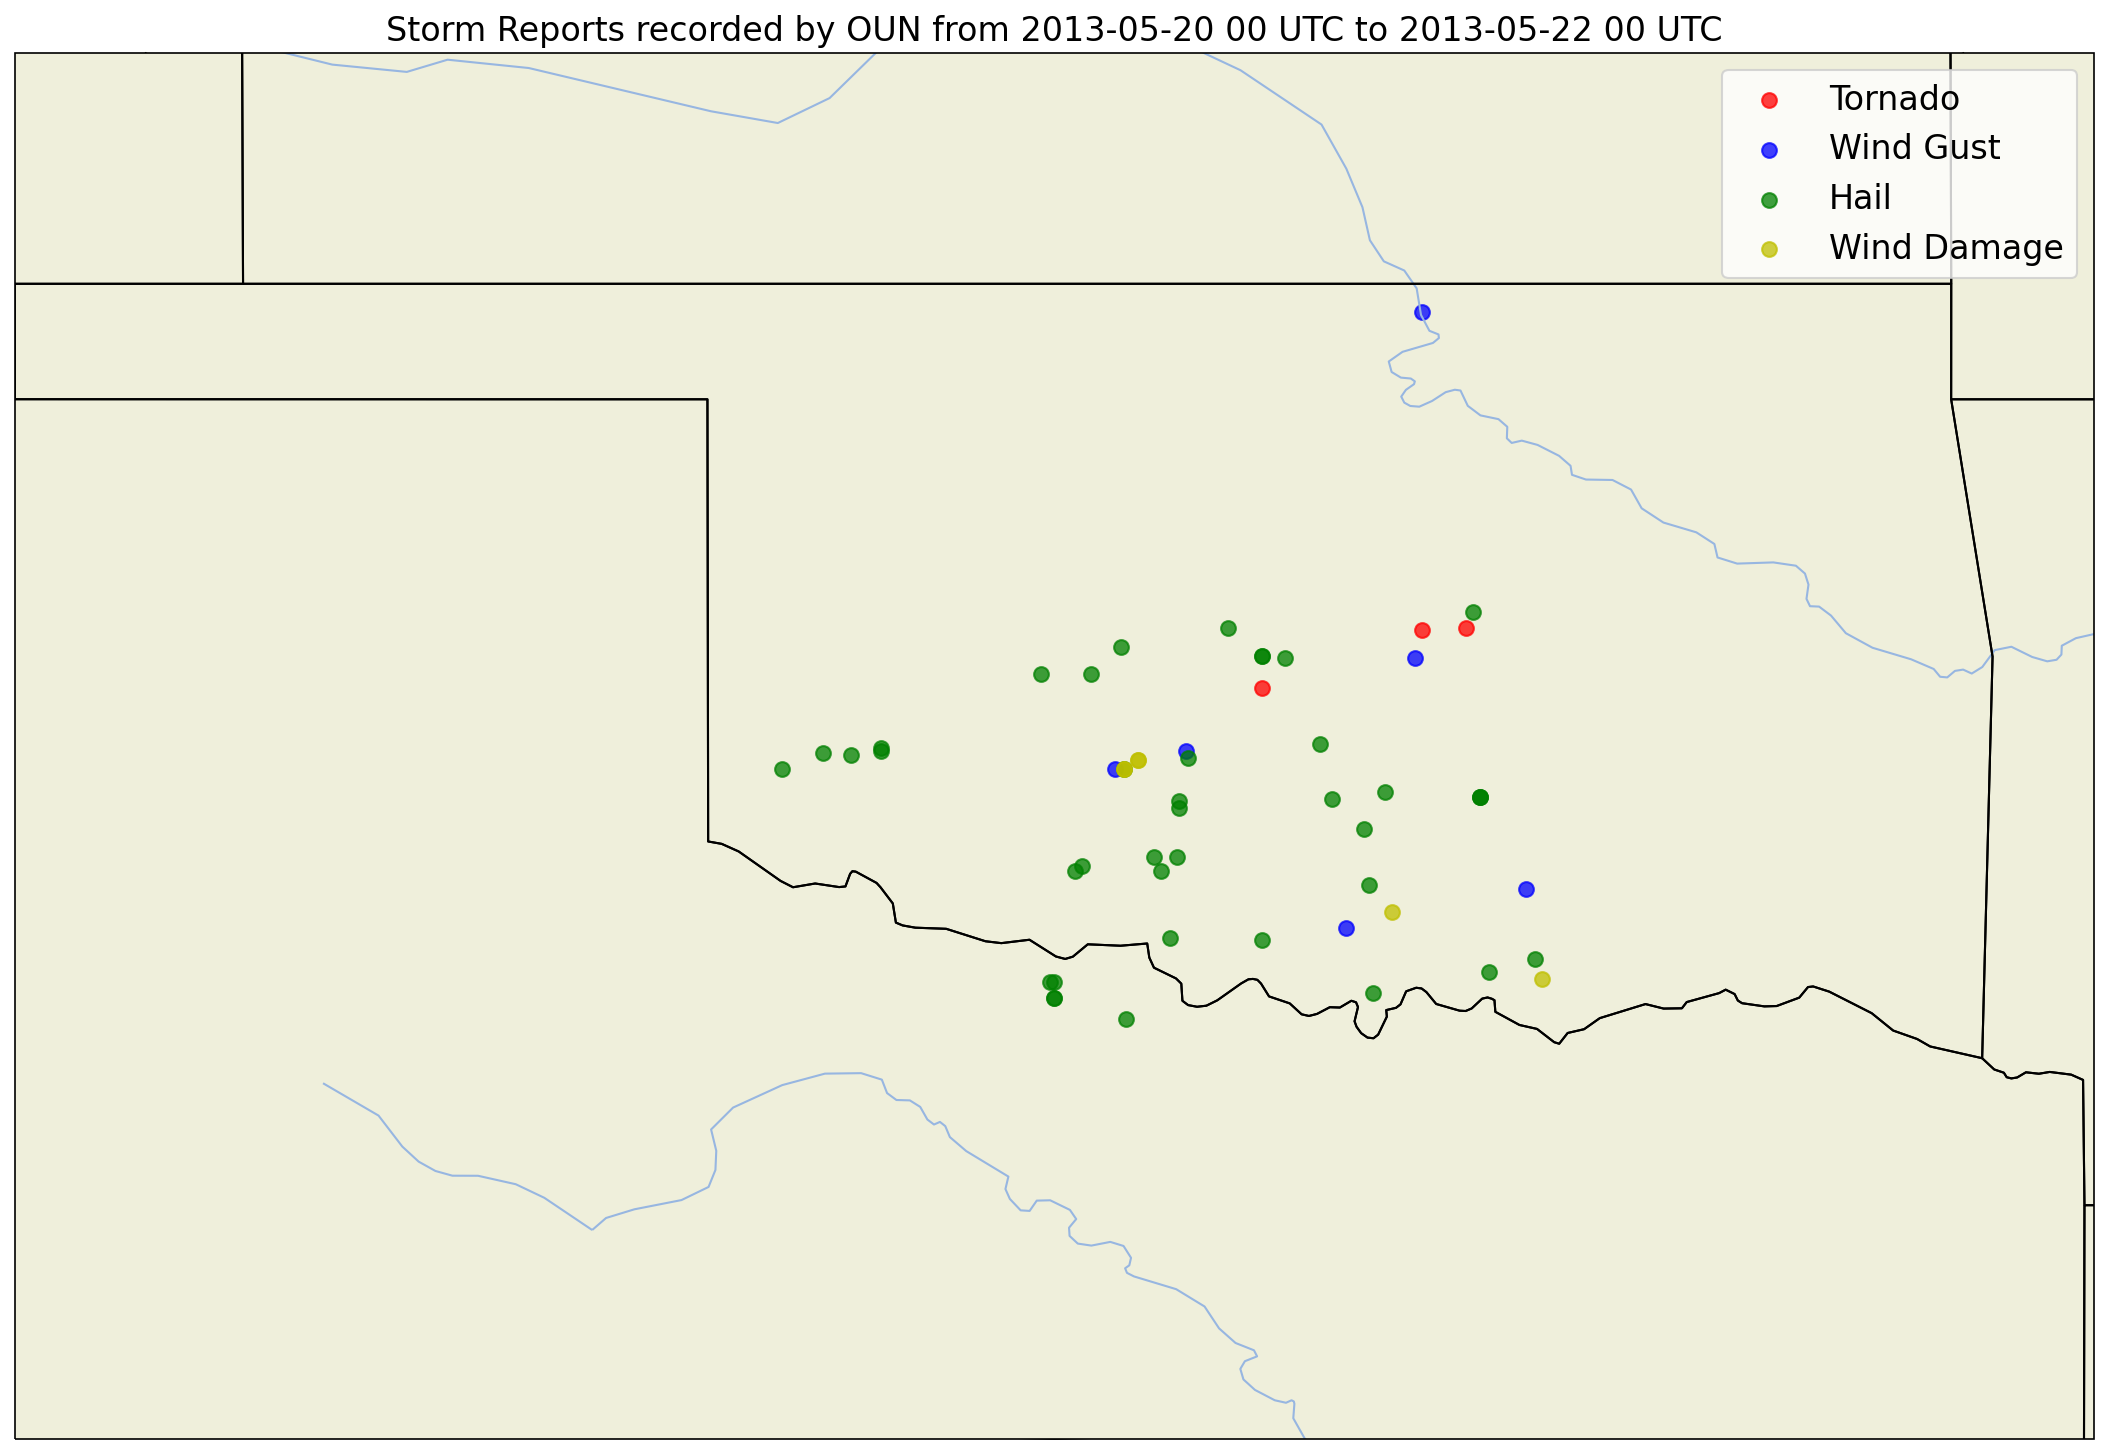

In [20]:
fig=plt.figure(figsize=(18,12),dpi=150)
ax = fig.add_subplot(1,1,1, projection=proj_map)
ax= plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lonW,lonE,latS,latN])
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature(cfeature.RIVERS.with_scale(res))
ax.add_feature(cfeature.LAND.with_scale(res))
ax.add_feature(cfeature.LAKES.with_scale(res))
ax.add_feature(cfeature.STATES.with_scale(res))

ax.set_title("Storm Reports recorded by OUN from 2013-05-20 00 UTC to 2013-05-22 00 UTC", fontsize=16)


plt.scatter(lontornado,lattornado,s=50,c='r',alpha=0.75, transform=ccrs.PlateCarree(),label='Tornado')


plt.scatter(lonwindg,latwindg,s=50,c='b',alpha=0.75, transform=ccrs.PlateCarree(),label="Wind Gust")


plt.scatter(lonthail,lathail,s=50,c='g',alpha=0.75, transform=ccrs.PlateCarree(),label="Hail")


plt.scatter(lonwindd,latwindd,s=50,c='y',alpha=0.75, transform=ccrs.PlateCarree(),label="Wind Damage")

plt.legend(fontsize=16)

fileName ='<OUN>_LSR_<start2013052000>.png.'
fig.savefig(fileName)